# PSF reconstruction using PSFEx

This short notebook can be seen as a preamble to the more complete [SingleBand-PSF.ipynb](03.1_SingleBand-PSF.ipynb). Here, the goal is to run PSFEx with a FITS_LDAC catalog (created with SExtractor) of the best point-like sources to reconstruct the PSF of the telescope, which will be used for SourceXtractor++ model fitting.

In [1]:
import sys
sys.path.append('/home/ec2-user/DAWN/DJA-SEpp')
import importlib
psfex = importlib.import_module("03_PSFEx")

In [2]:
field = 'GDS'
psfex.run_psfex(config_file = "/home/ec2-user/DAWN/DJA-SEpp/config/psfex_default.conf",
                cat_name = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/gds-grizli-v7.0-f444w-clear_drc_star_cat.fits",
                output_cat = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/gds-grizli-v7.0-f444w-clear_drc_star_psf_cat.fits",
                dir_chckimg = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/checkimages",
                dir_psfex = f"/home/ec2-user/DAWN/DJA-SEpp/psfex/{field}",
                fwhm_range='1.0,100.0', verbose=False)


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.



'/home/aurelien/DAWN/DJA_SE++/JADES-psfex/gds-grizli-v7.0-f444w-clear_drc_star_cat_psf.psf'

The `compare_star` function uses the raw SExtarctor catalog and the point-like sources catalog to look at the differences between the computed PSF and compare how the point-like sources selection of PSF with the MU_MAX v. MAG_AUTO devised in this project.


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.



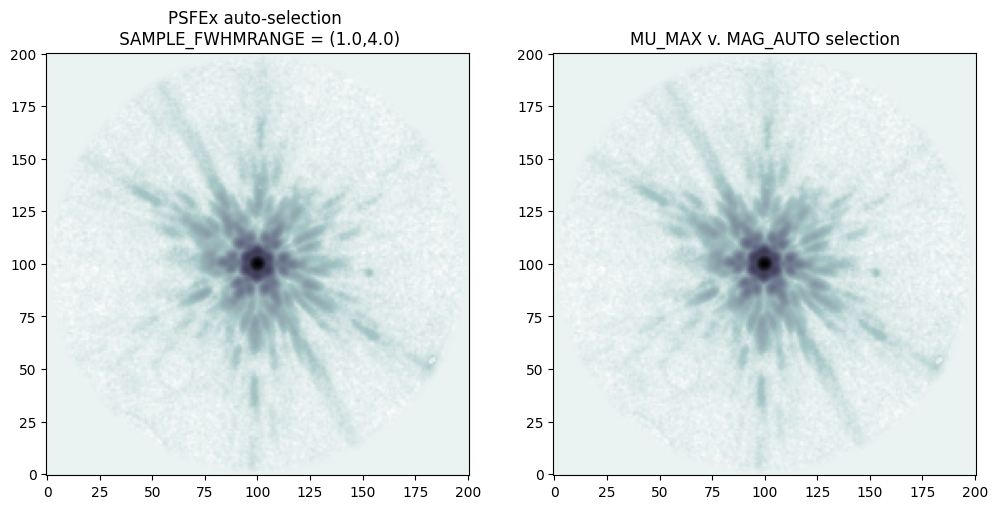

In [12]:
filter = 'f200w'
psfex.compare_star(cat_name = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/gds-grizli-v7.0-{filter}-clear_drc_cat.fits",
                   cat_name_star = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/gds-grizli-v7.0-{filter}-clear_drc_star_cat.fits",
                   output_cat = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/gds-grizli-v7.0-{filter}-clear_drc_psf_cat.fits",
                   output_cat_star = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/gds-grizli-v7.0-{filter}-clear_drc_star_psf_cat.fits",
                   dir_chckimg = f"/home/ec2-user/DAWN/DJA-SEpp/catalog/{field}/checkimages",
                   dir_psfex = f"/home/ec2-user/DAWN/DJA-SEpp/psfex/{field}",
                   config_file = "/home/ec2-user/DAWN/DJA-SEpp/config/psfex_default.conf")